In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import xarray as ax
from datetime import datetime,date
import skill_metrics as sm
import tkinter 
import scipy as sp
from scipy import stats
from warnings import filterwarnings
filterwarnings('ignore')


In [2]:
SUM_SH=ax.open_dataset('/home/eric/Desktop/ALL/FINAL_PRO/SUM_SH.nc')
SUM_LE=ax.open_dataset('/home/eric/Desktop/ALL/FINAL_PRO/SUM_LE.nc')
# SUM_NR=ax.open_dataset('/home/eric/Desktop/ALL/FINAL_PRO/SUM_NR.nc')

In [3]:
# SUM_LE.slhf.plot()

In [4]:
SH_13 =SUM_SH.sel(time=slice('2013'))#Sensible heat for 2013

In [5]:
LE_13=SUM_LE.sel(time=slice('2013'))# Latent heat for 2013

In [6]:
daily_mean = SH_13.mean(dim=['lon','lat'])#Mean sensible heat along the lon and lat
d=daily_mean.resample(time='D').mean()#daily mean sensible heat

d_mean=LE_13.mean(dim=['lon','lat']).resample(time='D').mean()#Mean latent heat along the lon and lat

In [7]:
# Convertion from j/m2 to w/m2
j=d.sshf/(-60*60)
k=d_mean.slhf/(-60*60)

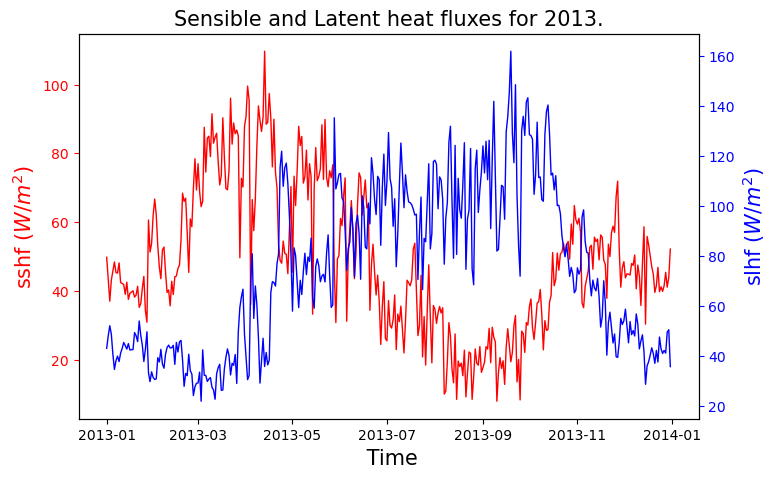

In [8]:
# Testing the relationship between latent heat and sensible heat 
fig, axes=plt.subplots(figsize=(8,5))


# ax1=axes.twinx()
ax1=axes
ax1.plot(d.time,d.sshf/(-60*60),color='RED',lw=1, ls="-")
ax1.set_xlabel(' Time',fontsize=15)
ax1.set_ylabel('sshf ($W/m^2$)',color='red', fontsize=15)

ax2=axes.twinx()
# ax2=axes
ax2.plot(d.time,d_mean.slhf/(-60*60),color='BLUE',lw=1, ls="-")
# ax2.set_xlabel('Hours (UTC)',fontsize=15)
ax2.set_ylabel('slhf ($W/m^2$)',color='blue',fontsize=15)
# ax2.set_title('Timeseries and bar chart',fontsize=15)
ax2.set_title('Sensible and Latent heat fluxes for 2013.',color='black', fontsize=15)
ax2.tick_params(axis='y', colors='blue')
ax1.tick_params(axis='y', colors='red')
fig.savefig("Test.jpeg")

In [9]:
j.to_netcdf('sshf_mean13.nc')#saving as .nc file
k.to_netcdf('slhf_mean13.nc')#saving as .nc file

In [10]:
df=pd.read_excel('sum_gr_2013.xlsx') #reading the csv data

In [11]:
df

,Days,H_Obs_Closed,H_Mod_Closed,H_Satellite,LE_Obs_Closed,LE_Mod_Closed,LE_Satellite
0,1,38.940892,50.693450,49.7418,3.566742,5.084050,43.1926
1,2,31.144714,43.851981,43.2007,3.359530,3.729060,48.1723
2,3,34.257935,52.115361,36.9763,3.577617,3.685264,52.1772
3,4,31.088148,52.397182,43.0810,6.165069,3.219485,48.8349
4,5,43.212073,65.378698,45.7747,5.640447,2.782968,40.8331
...,...,...,...,...,...,...,...
360,361,NaN,48.152673,41.4734,NaN,3.019202,42.3365
361,362,NaN,52.728166,45.3660,NaN,2.840168,41.2612
362,363,NaN,52.571272,41.0549,NaN,2.867062,49.6534
363,364,NaN,21.840476,43.9025,NaN,2.353482,50.6038


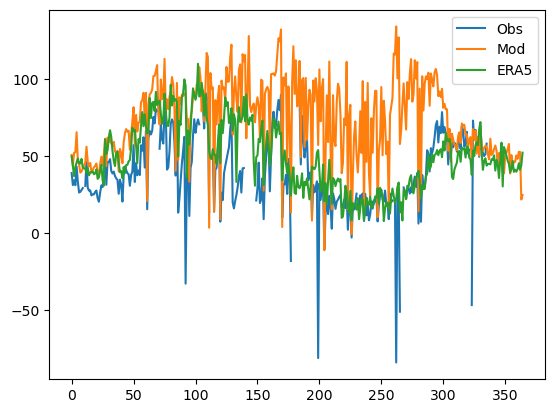

In [12]:
fd=df[['H_Obs_Closed','H_Mod_Closed','H_Satellite']]#Sensible heat
fd.H_Obs_Closed.plot(label='Obs')
fd.H_Mod_Closed.plot(label='Mod')
fd.H_Satellite.plot(label='ERA5')
plt.legend()

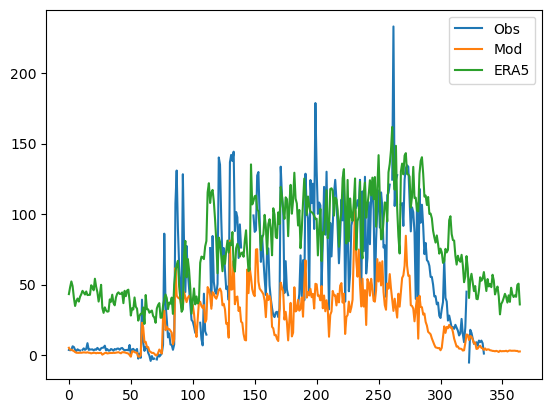

In [13]:
#Plot for latent heat flux
f=df[['LE_Obs_Closed','LE_Mod_Closed','LE_Satellite']]#Latent heat
f.LE_Obs_Closed.plot(label='Obs')
f.LE_Mod_Closed.plot(label='Mod')
f.LE_Satellite.plot(label='ERA5')
plt.legend()

In [14]:
# Convert date column to datetime format and set as index

df['Days']=pd.to_datetime(df['Days'])

fd=pd.DataFrame(df)# converting the data df into a dataframe


# Create a new data frame with all Days
all_months = pd.DataFrame(pd.date_range('2013-01-01', '2013-12-31', freq='D'))


fd['Days']=all_months #Replacing the Days with the dataframe created


fd.set_index('Days', inplace=True)#Setting the days as the index


fd.resamp=fd.resample('M').mean()# Resampling and calculating the monthly mean

In [15]:
fd

,H_Obs_Closed,H_Mod_Closed,H_Satellite,LE_Obs_Closed,LE_Mod_Closed,LE_Satellite
Days,,,,,,
2013-01-01,38.940892,50.693450,49.7418,3.566742,5.084050,43.1926
2013-01-02,31.144714,43.851981,43.2007,3.359530,3.729060,48.1723
2013-01-03,34.257935,52.115361,36.9763,3.577617,3.685264,52.1772
2013-01-04,31.088148,52.397182,43.0810,6.165069,3.219485,48.8349
2013-01-05,43.212073,65.378698,45.7747,5.640447,2.782968,40.8331
...,...,...,...,...,...,...
2013-12-27,NaN,48.152673,41.4734,NaN,3.019202,42.3365
2013-12-28,NaN,52.728166,45.3660,NaN,2.840168,41.2612
2013-12-29,NaN,52.571272,41.0549,NaN,2.867062,49.6534


In [16]:
fd.resamp

,H_Obs_Closed,H_Mod_Closed,H_Satellite,LE_Obs_Closed,LE_Mod_Closed,LE_Satellite
Days,,,,,,
2013-01-31,31.879825,47.067748,43.132413,4.258003,1.832480,42.702323
2013-02-28,39.877748,63.844152,53.473818,3.281410,1.196234,37.535193
2013-03-31,57.701172,85.385238,78.791639,21.691313,14.752497,36.848165
2013-04-30,53.274590,82.907607,74.000927,42.411888,35.944712,68.217663
2013-05-31,35.599027,91.014808,69.533606,92.301006,38.754150,78.114171
2013-06-30,45.994310,88.108322,53.032073,65.094880,34.572261,96.429627
2013-07-31,29.099109,77.183203,34.042842,86.965447,38.626340,99.617332
2013-08-31,17.794685,61.590457,21.097021,91.015070,44.853596,103.319100
2013-09-30,15.633420,78.264777,22.280502,107.008995,47.778000,118.016440


In [17]:
np.max(f.LE_Mod_Closed)

104.2032527

In [18]:
np.min(f.LE_Satellite)

22.0493

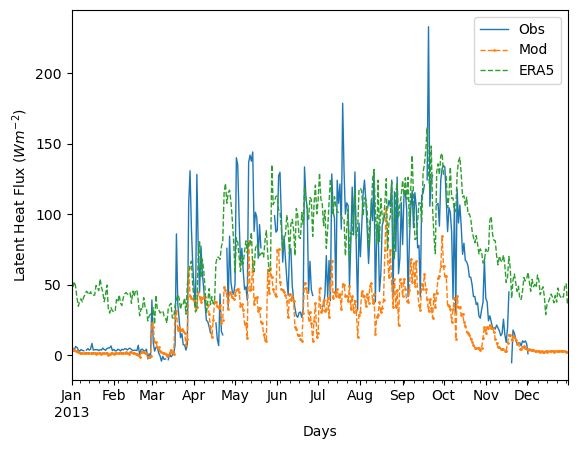

In [19]:
# Plotting multiple time series
f=fd[['LE_Obs_Closed','LE_Mod_Closed','LE_Satellite']]#Sensible heat
f.LE_Obs_Closed.plot(label='Obs',lw=1)
f.LE_Mod_Closed.plot(label='Mod',lw=1,ls="--",marker='o',ms=1)
f.LE_Satellite.plot(label='ERA5',lw=1,ls='--')
# plt.xlabel('Months')
plt.ylabel('Latent Heat Flux $(Wm^{-2})$')
plt.xlabel('Days')
# plt.title('Daily Mean Latent Heat Flux')
plt.legend()
plt.savefig('Latent_heat.jpeg')

In [21]:
np.max(g.H_Mod_Closed)

133.819097

In [22]:
np.min(g.H_Mod_Closed)

-11.00025792

In [23]:
np.max(g.H_Satellite)

109.71

In [24]:
np.min(g.H_Satellite)

7.86411

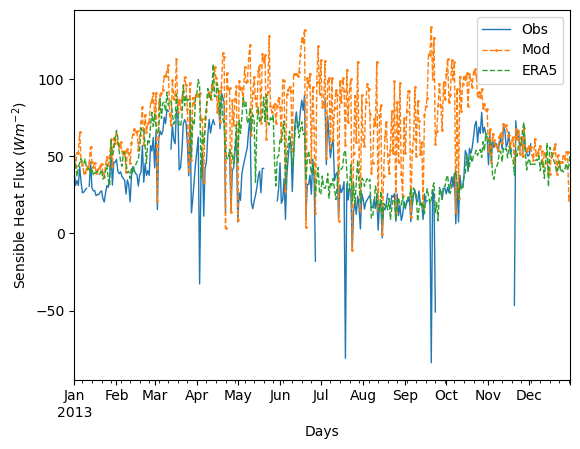

In [18]:
g=fd[['H_Obs_Closed','H_Mod_Closed','H_Satellite']]#Sensible heat
g.H_Obs_Closed.plot(label='Obs',lw=1)
g.H_Mod_Closed.plot(label='Mod',lw=1,ls="--",marker='o',ms=1)
g.H_Satellite.plot(label='ERA5',lw=1,ls='--')
plt.ylabel('Sensible Heat Flux $(Wm^{-2})$')
plt.legend()
# plt.title('Daily Mean Sensible Heat Flux')
# plt.grid()
plt.savefig('Sensible_Heat.jpeg')

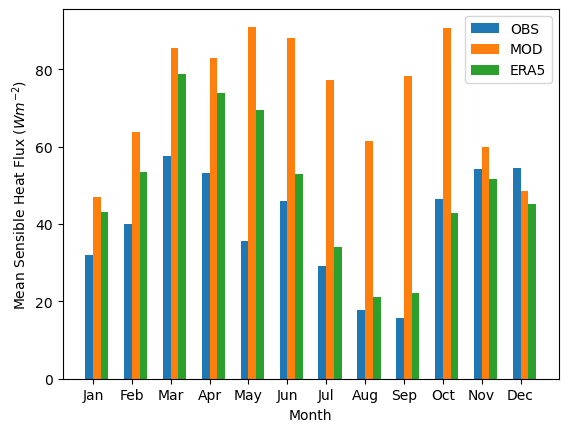

In [19]:
# Creating a list of months
fd.nam=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']


# Plotting a bar plot
values=np.arange(len(fd.nam))

width=0.2
plt.bar(values,fd.resamp['H_Obs_Closed'],width,label='OBS')
# plt.bar(fd.index,H_Mod_Closed)
plt.bar(values+width,fd.resamp['H_Mod_Closed'],width,label='MOD')
plt.bar(values+(2*width),fd.resamp['H_Satellite'],width,label='ERA5')
plt.legend()
plt.xticks(values+0.1,fd.nam)
# plt.title('Monthly mean of observed and Model predicted sensible Heat Flux')
plt.xlabel('Month')
plt.ylabel('Mean Sensible Heat Flux $(Wm^{-2})$')
plt.savefig('SH_Bplot.jpeg')


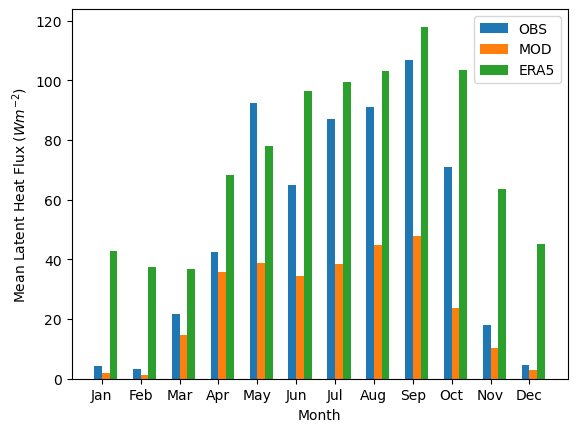

In [20]:
# Creating a list of months
fd.nam=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']


# Plotting a bar plot
values=np.arange(len(fd.nam))

width=0.2
plt.bar(values,fd.resamp['LE_Obs_Closed'],width,label='OBS')
# plt.bar(fd.index,H_Mod_Closed)
plt.bar(values+width,fd.resamp['LE_Mod_Closed'],width,label='MOD')
plt.bar(values+(2*width),fd.resamp['LE_Satellite'],width,label='ERA5')
plt.legend()
plt.xticks(values+0.1,fd.nam)
# plt.title('Monthly mean of observed and Model predicted Latent Heat Flux')
plt.xlabel('Month')
plt.ylabel('Mean Latent Heat Flux $(Wm^{-2})$')
plt.savefig('LE_Bplot.jpeg')

In [23]:
# values=np.arange(len(fd.nam))

# width=0.2
# plt.bar(values,fd.resamp['H_Obs_Closed'],width,label='OBS')
# # plt.bar(fd.index,H_Mod_Closed)
# plt.bar(values+width,fd.resamp['H_Satellite'],width,label='ERA5 ')
# plt.legend()
# plt.xticks(values+0.1,fd.nam)
# plt.title('Monthly mean of observed and ERA5 predicted sensible Heat Flux')
# plt.xlabel('Month')
# plt.ylabel('Sensible Heat Flux')

In [24]:
# values=np.arange(len(fd.nam))

# width=0.2
# plt.bar(values,fd.resamp['H_Mod_Closed'],width,label='MOD')
# # plt.bar(fd.index,H_Mod_Closed)

# plt.bar(values+width,fd.resamp['H_Satellite'],width,label='ERA5 ')
# plt.legend()
# plt.xticks(values+0.1,fd.nam)
# plt.title('Monthly mean of observed and ERA5 predicted sensible Heat Flux')
# plt.xlabel('Month')
# plt.ylabel('Sensible Heat Flux')

# Assesment of Latent  Heat Flux

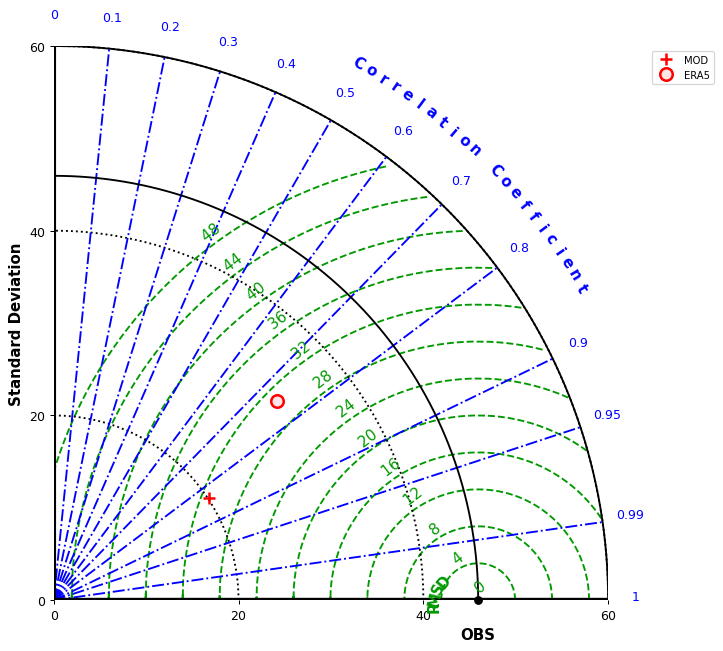

In [28]:
slf = pd.DataFrame([fd.LE_Satellite, fd.LE_Obs_Closed])# Extracting portion of the data
slf_2 = pd.DataFrame([fd.LE_Mod_Closed, fd.LE_Obs_Closed])

slf=slf.T      #Transposed
slf_2=slf_2.T


slf=slf.dropna()
slf_2=slf_2.dropna()

slf_era=slf.LE_Satellite#Select all the era5 LE
slf_obs=slf.LE_Obs_Closed#Select all the OBS LE

slf_mod=slf_2.LE_Mod_Closed#Select all the Mod LE


slf_Era = stats.pearsonr(slf_era,slf_obs)#Correlation
slf_Mod = stats.pearsonr(slf_mod,slf_obs)

slfm_Era = sum((slf_obs-slf_era)**2)/len(slf_obs)#calculation of mean
slfm_Mod = sum((slf_obs-slf_mod)**2)/len(slf_obs)

rmse_Era = np.sqrt(slfm_Era)#calculation of root mean square
rmse_Mod = np.sqrt(slfm_Mod)


slfbias_Era = sum(slf_era-slf_obs)/len(slf_obs)#Bias
slfbias_Mod = sum(slf_mod-slf_obs)/len(slf_obs)



slfstd_Era = np.std(slf_era)# standard deviation 
slfstd_Mod = np.std(slf_mod)
slfobs = np.std(slf_obs)

slpd_cor = [1, slf_Mod[0],slf_Era[0]]
slpd_rmse = [1,rmse_Mod,rmse_Era]
slpd_bias = [slfbias_Mod,slfbias_Era]
slpd_std = [slfobs,slfstd_Mod,slfstd_Era]
label = ['OBS','MOD','ERA5']
# numberArray = np.array(([1,2,3],[4,5,6]))



fig1 = plt.figure(figsize=(12,8),dpi=90)

sdev = np.array(slpd_std)
crmsd = np.array(slpd_rmse)
ccoef = np.array(slpd_cor)
rms = np.arange(0,50,4)
# rms = np.arange(0,40,2)

fig1=sm.taylor_diagram(sdev,crmsd,ccoef, markerLabel =label, 
                          markerLegend = 'on',
                          styleOBS = '-', colOBS = 'k', markerobs = 'o',
                          markerSize = 10, tickRMS = rms,
                          showlabelsRMS = 'on',cmapzdata = crmsd ,rincSTD = np.arange(26,30,0.05),
                          titleRMS = 'on', titleOBS = r'OBS',alpha=0.1)
plt.savefig("SLH_Taylor.jpeg")

In [29]:
sdev

array([45.93423838, 20.16704126, 32.37971772])

In [30]:
crmsd

array([ 1.        , 41.56632763, 38.25734199])

In [31]:
ccoef

array([1.        , 0.83433446, 0.74518742])

# Assesment of Sensible Heat Flux

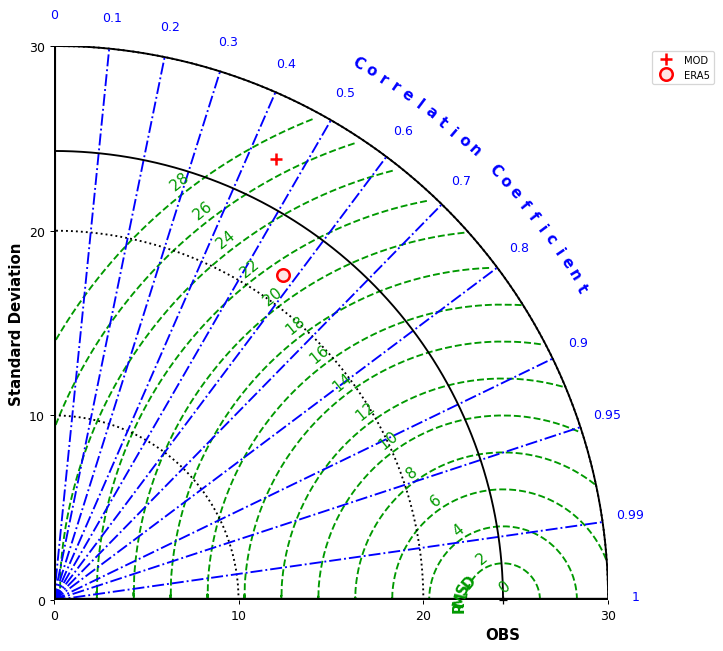

In [32]:
slf1 = pd.DataFrame([fd.H_Satellite, fd.H_Obs_Closed])# Extracting portion of the data
slf_3 = pd.DataFrame([fd.H_Mod_Closed, fd.H_Obs_Closed])

slf1=slf1.T      #Transposed
slf_3=slf_3.T


slf1=slf1.dropna()
slf_3=slf_3.dropna()

slf_er=slf1.H_Satellite     #Select all the era5 H
slf_obs=slf1.H_Obs_Closed    #Select all the OBS H

slf_mo=slf_3.H_Mod_Closed   #Select all the Mod H


slf_Era = stats.pearsonr(slf_er,slf_obs)  #Correlation
slf_Mod = stats.pearsonr(slf_mo,slf_obs)

slfm_Era = sum((slf_obs-slf_era)**2)/len(slf_obs) #calculation mean
slfm_Mod = sum((slf_obs-slf_mo)**2)/len(slf_obs)

rmse_Era = np.sqrt(slfm_Era)  #calculation of root mean square
rmse_Mod = np.sqrt(slfm_Mod)


slfbias_Era = (sum(slf_obs-slf_er))/len(slf_obs) #Bias
slfbias_Mod = (sum(slf_obs-slf_mo))/len(slf_obs)



slfstd_Era = np.std(slf_er)# standard deviation 
slfstd_Mod = np.std(slf_mo)
slfobs = np.std(slf_obs)


slpd_cor = [1, slf_Mod[0],slf_Era[0]]
slpd_rmse = [0,rmse_Mod,rmse_Era]
slpd_bias = [ slfbias_Mod,slfbias_Era]
slpd_std = [slfobs,slfstd_Mod,slfstd_Era]
label = ['OBS','MOD','ERA5']
# numberArray = np.array(([1.1,2.2,3.3],[4.4,5.5,6.6]))




fig1 = plt.figure(figsize=(12,8),dpi=90)

sdev = np.array(slpd_std)
crmsd = np.array(slpd_rmse)
ccoef = np.array(slpd_cor)
rms = np.arange(0,30,2)
# rms = np.arange(0,40,2)

fig1=sm.taylor_diagram(sdev,crmsd,ccoef, markerLabel =label, 
                          markerLegend = 'on',
                          styleOBS = '-', colOBS = 'k', markerobs = '+',
                          markerSize = 10, tickRMS = rms,
                          showlabelsRMS = 'on',cmapzdata = crmsd ,rincSTD = np.arange(26,30,0.05),
                          titleRMS = 'on', titleOBS = r'OBS',alpha=0.1)
plt.savefig('SSH_Taylor.jpeg')
# plt.suptitle('A Taylor Diagram Representing Sensible Heat of Model, ERA5 and Observation')

In [33]:
sdev

array([24.31184882, 26.73763961, 21.53045751])

In [34]:
crmsd

array([ 0.        , 44.19899485, 59.36779531])

In [35]:
ccoef

array([1.        , 0.45022755, 0.57680934])

In [132]:
def calculate_rmse(actual_values, predicted_values):
    # Convert the input lists or arrays to NumPy arrays (optional, but recommended for performance)
    actual_values = np.array(actual_values)
    predicted_values = np.array(predicted_values)

    # Ensure both arrays have the same length
    if len(actual_values) != len(predicted_values):
        raise ValueError("Both arrays must have the same length.")

    # Calculate the squared differences between actual and predicted values
    squared_diff =(sum(actual_values - predicted_values) ** 2)/len(actual_values)

#     # Calculate the mean of squared differences
#     mean_squared_diff = squared_diff.mean()

#     # Calculate the RMSE by taking the square root of the mean squared differences
    rmse = np.sqrt(squared_diff)

    return rmse

# Example usage:
actual_values = [-3,- 5, -2,- 7, -8]
predicted_values = [4, 6, 1, 6, 9]
rmse_value = calculate_rmse(actual_values, predicted_values)
print("Root Mean Square Error:", rmse_value)


Root Mean Square Error: 22.807893370497855
